In [1]:
# Importing required libraries
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating dirs train, valid and test and organize data into them
os.chdir('D:\SACHIN\Jupyter\Hand Sign Language\Hand_Sign_Language_DL_Project\American-Sign-Language-Digits-Dataset')

# If dir doesn't exist then make specified dirs
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range(0, 10):
        # Moving 0-9 dirs into train dir
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        # Take 90 sample imgs for valid dir
        valid_samples = random.sample(os.listdir(f'train/{i}'), 90)
        for j in valid_samples:
            # Moving the sample imgs from train dir to valid sub-dirs
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
        
        # Take 10 sample imgs for test dir
        test_samples = random.sample(os.listdir(f'train/{i}'), 10)
        for k in test_samples:
            # Moving the sample imgs from train dir to test sub-dirs
            shutil.move(f'train/{i}/{k}', f'test/{i}')
            
os.chdir('../..')

In [3]:
# Specifying path for train, valid and test dirs
train_path = 'D:/SACHIN/Jupyter/Hand Sign Language/Hand_Sign_Language_DL_Project/American-Sign-Language-Digits-Dataset/train'
valid_path = 'D:/SACHIN/Jupyter/Hand Sign Language/Hand_Sign_Language_DL_Project/American-Sign-Language-Digits-Dataset/valid'
test_path = 'D:/SACHIN/Jupyter/Hand Sign Language/Hand_Sign_Language_DL_Project/American-Sign-Language-Digits-Dataset/test'

In [4]:
# Importing tensorflow and its utilities
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from PIL import Image

In [5]:
#  Creating batches of the train, valid and test images and Pre-processing using mobilenet preprocess model
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10, shuffle=True)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10, shuffle=True)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1000 images belonging to 10 classes.
Found 900 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


## Modelling

In [6]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [7]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [8]:
# Removing last 6 layers and adding our output layer
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [9]:
model = Model(inputs=mobile.input, outputs=output)

In [10]:
# We are not going to train last 23 layers and it's an arbitrary number
for layer in mobile.layers[:-23]:
    layer.trainable=False

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Running 10 epochs
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 85s - loss: 0.5333 - accuracy: 0.8660 - val_loss: 0.6474 - val_accuracy: 0.7811
Epoch 2/10
100/100 - 81s - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9956
Epoch 3/10
100/100 - 80s - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9978
Epoch 4/10
100/100 - 82s - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 0.9978
Epoch 5/10
100/100 - 83s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9978
Epoch 6/10
100/100 - 81s - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 0.9978
Epoch 7/10
100/100 - 81s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 0.9989
Epoch 8/10
100/100 - 82s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 0.9989
Epoch 9/10
100/100 - 81s - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 0.9989
Epoch 10/10
100/100 - 80s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0045 - val_accura

## Saving a model

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [28]:
# Checking if the model exist otherwise save the model
if os.path.isfile("D:/SACHIN/Models/Hand-Sign-Digit-Language/digit_model.h5") is False:
    model.save("D:/SACHIN/Models/Hand-Sign-Digit-Language/digit_model.h5")

# Testing

## Loading model

In [13]:
my_model = load_model("D:/SACHIN/Models/Hand-Sign-Digit-Language/digit_model.h5")

In [14]:
def preprocess_img(img_path):
    open_img = image.load_img(img_path, target_size=(224, 224))
    img_arr = image.img_to_array(open_img)/255.0
    img_reshape = img_arr.reshape(1, 224,224,3)
    return img_reshape

In [15]:
def predict_result(predict):
    pred = my_model.predict(predict)
    return np.argmax(pred[0], axis=-1)

In [16]:
# Function to display and predicting the Image
def display_and_predict(img_path_input):
    display_img = Image.open(img_path_input)
    plt.imshow(display_img)
    plt.show()
    img = preprocess_img(img_path_input)
    pred = predict_result(img)
    print("Prediction: ", pred)

Enter the path of an image: D:/SACHIN/Pycharm/DL_Project_Hand_Sign_Language/test_images/5/Sign 5 (39).jpeg


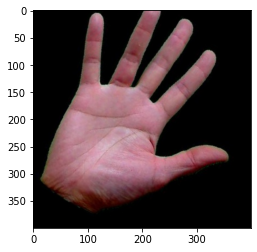

Prediction:  5


In [17]:
img_input = input("Enter the path of an image: ")
display_and_predict(img_input)